<a href="https://colab.research.google.com/github/world779/GCI/blob/first/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/GCI2020summer/コンペ第1回/input/'

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [200]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [201]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [202]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [203]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

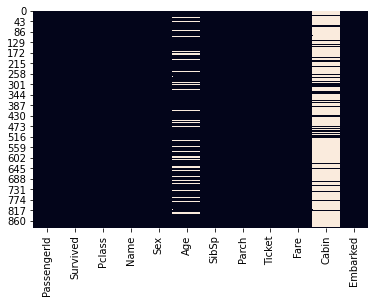

In [204]:
sns.heatmap(df.isnull(), cbar=False)

In [205]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

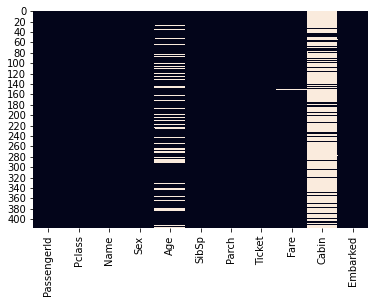

In [206]:
sns.heatmap(df_test.isnull(), cbar=False)

In [0]:
#df=df.drop("Cabin", axis=1)

In [0]:
#df_test=df_test.drop("Cabin", axis=1)

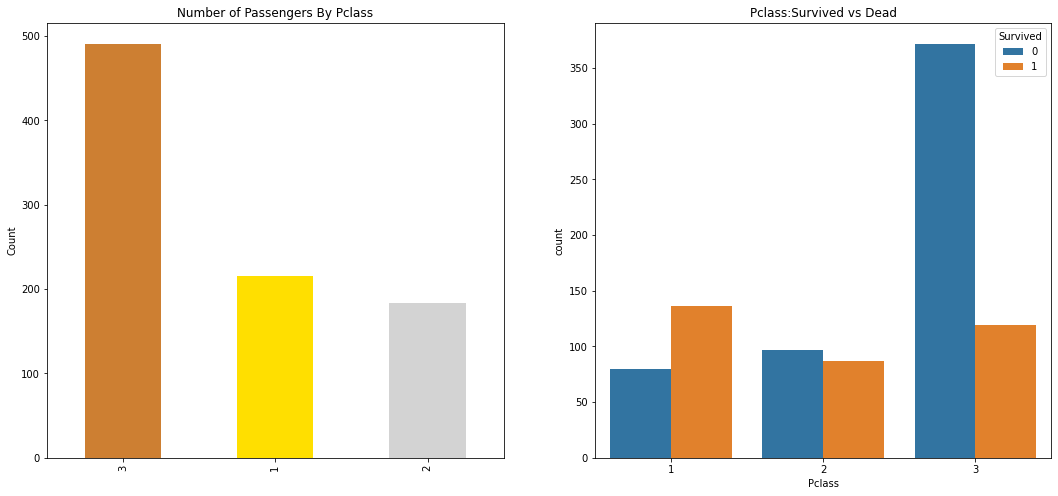

In [209]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

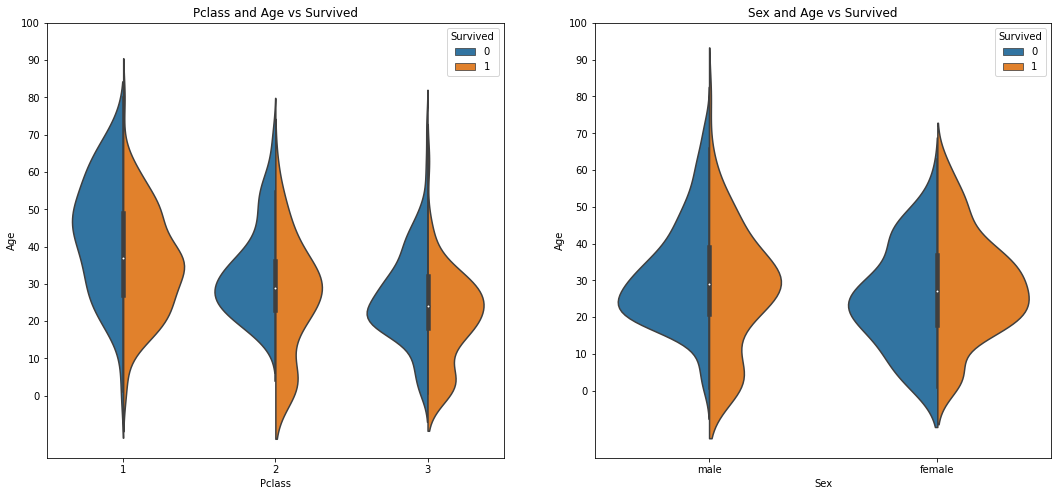

In [210]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

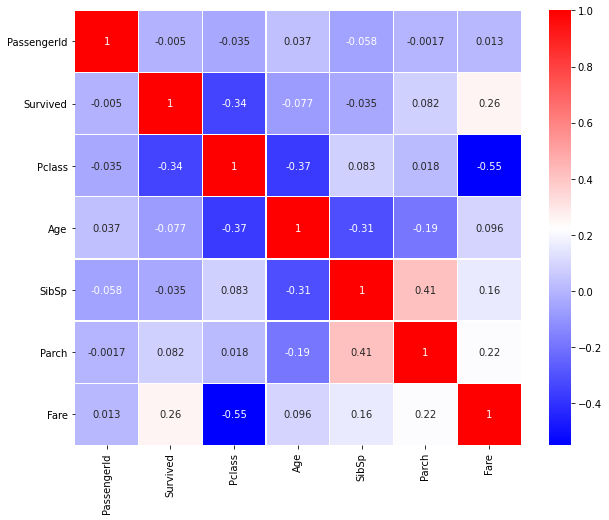

In [211]:
sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

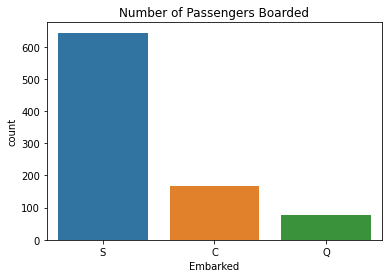

In [212]:
sns.countplot('Embarked',data=df)
plt.title('Number of Passengers Boarded')
plt.show()

In [213]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [214]:

df_test["Fare"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool

In [215]:
group=df_test.groupby("Pclass").mean()
print(group)
fare_mean=group.loc[3,"Fare"]

        PassengerId        Age     SibSp     Parch       Fare
Pclass                                                       
1       1098.224299  40.918367  0.476636  0.383178  94.280297
2       1117.935484  28.777500  0.376344  0.344086  22.202104
3       1094.178899  24.027945  0.463303  0.417431  12.459678


In [0]:
df_test=df_test.replace({'Fare': {np.nan: fare_mean}})

In [217]:
df_test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      12.4597
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [0]:
df['Embarked'].fillna('S',inplace=True)


In [219]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [220]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [221]:
df['honorific'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df['honorific'].value_counts() 

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Lady              1
Capt              1
Jonkheer          1
Don               1
Ms                1
Sir               1
Mme               1
Name: honorific, dtype: int64

In [222]:
df_test['honorific'] = df_test['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df_test['honorific'].value_counts() 

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: honorific, dtype: int64

In [0]:

df['honorific']=df['honorific'].replace("Master",1).replace("Mrs",2).replace("Miss",3).replace("Mr",4).replace("Dr",0).replace("Col",0).replace("Rev",0).replace("Don",0).replace("Mlle",0).replace("Major",0).replace("Mme",0).replace("Jonkheer",0).replace("Lady",0).replace("the Countess",0).replace("Capt",0).replace("Sir",0).replace("Ms",3)
df_test['honorific']=df_test['honorific'].replace("Master",1).replace("Mrs",2).replace("Miss",3).replace("Mr",4).replace("Dr",0).replace("Col",0).replace("Rev",0).replace("Dona",0).replace("Ms",3)

In [0]:
#df['honorific']=df['honorific'].replace("[^a-zA-Z]",0)
#df_test['honorific']=df_test['honorific'].replace("[^a-zA-Z]",0)

In [0]:

#honorific = pd.concat([df['honorific'], df_test['honorific']])

#honorific_ohe = pd.get_dummies(honorific)

#honorific_ohe_train = honorific_ohe[:891]
#honorific_ohe_test = honorific_ohe[891:]

#df = pd.concat([df, honorific_ohe_train], axis=1)
#df_test = pd.concat([df_test, honorific_ohe_test], axis=1)

#df.drop('honorific', axis=1, inplace=True)
#df_test.drop('honorific', axis=1, inplace=True)

In [226]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [0]:

df.loc[(df['Name'].str.contains('Mr\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Mr\.')].Age.mean()
df.loc[(df['Name'].str.contains('Mrs\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Mrs\.')].Age.mean()
df.loc[(df['Name'].str.contains('Miss\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Miss\.')].Age.mean()
df.loc[(df['Name'].str.contains('Master\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Master\.')].Age.mean()
df.loc[(df['Name'].str.contains('Dr\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Dr\.')].Age.mean()

In [228]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
honorific        0
dtype: int64

In [229]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [0]:
df_test.loc[(df_test['Name'].str.contains('Mr\.')) & (df_test['Age'].isnull()), 'Age'] = df_test[df_test['Name'].str.contains('Mr\.')].Age.mean()
df_test.loc[(df_test['Name'].str.contains('Mrs\.')) & (df_test['Age'].isnull()), 'Age'] = df_test[df_test['Name'].str.contains('Mrs\.')].Age.mean()
df_test.loc[(df_test['Name'].str.contains('Miss\.')) & (df_test['Age'].isnull()), 'Age'] = df_test[df_test['Name'].str.contains('Miss\.')].Age.mean()
df_test.loc[(df_test['Name'].str.contains('Master\.')) & (df_test['Age'].isnull()), 'Age'] =df_test[df_test['Name'].str.contains('Master\.')].Age.mean()
df_test.loc[(df_test['Name'].str.contains('Ms\.')) & (df_test['Age'].isnull()), 'Age'] = df_test.Age.mean()

In [231]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
honorific        0
dtype: int64

In [232]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,4
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [0]:
df = df.drop(['Name'], axis=1)
df_test=df_test.drop(['Name'], axis=1)

In [234]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,4
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,4
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,4
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [0]:
df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

In [0]:

embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

In [0]:
combine1 = [df]
for df in combine1: 
        df['Ticket_Lett'] = df['Ticket'].apply(lambda x: str(x)[0])
        df['Ticket_Lett'] = df['Ticket_Lett'].apply(lambda x: str(x)) 
        df['Ticket_Lett'] = np.where((df['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df['Ticket_Lett'], np.where((df['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        df['Ticket_Len'] = df['Ticket'].apply(lambda x: len(x)) 
        del df['Ticket'] 
 
df['Ticket_Lett']=df['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)


In [0]:
combine=[df_test]
for df_test in combine:
        df_test['Ticket_Lett'] = df_test['Ticket'].apply(lambda x: str(x)[0])
        df_test['Ticket_Lett'] = df_test['Ticket_Lett'].apply(lambda x: str(x))
        df_test['Ticket_Lett'] = np.where((df_test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), df_test['Ticket_Lett'],
                                   np.where((df_test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        df_test['Ticket_Len'] = df_test['Ticket'].apply(lambda x: len(x))
        del df_test['Ticket']
df_test['Ticket_Lett']=df_test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 
 

In [239]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,honorific,C,Q,S,Ticket_Lett,Ticket_Len
0,1,0,3,0,22.0,1,0,7.2500,NaN,4,0,0,1,3,9
1,2,1,1,1,38.0,1,0,71.2833,C85,2,1,0,0,0,8
2,3,1,3,1,26.0,0,0,7.9250,NaN,3,0,0,1,3,16
3,4,1,1,1,35.0,1,0,53.1000,C123,2,0,0,1,1,6
4,5,0,3,0,35.0,0,0,8.0500,NaN,4,0,0,1,3,6


In [0]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
for df in combine1:
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [0]:
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1
 
for df_test in combine:
    df_test['IsAlone'] = 0
    df_test.loc[df_test['FamilySize'] == 1, 'IsAlone'] = 1

In [0]:
for df in combine1: 
    df['Cabin_Lett'] = df['Cabin'].apply(lambda x: str(x)[0]) 
    df['Cabin_Lett'] = df['Cabin_Lett'].apply(lambda x: str(x)) 
    df['Cabin_Lett'] = np.where((df['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),df['Cabin_Lett'], np.where((df['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
    del df['Cabin']
 
df['Cabin_Lett']=df['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

In [0]:
for df_test in combine:
        df_test['Cabin_Lett'] = df_test['Cabin'].apply(lambda x: str(x)[0])
        df_test['Cabin_Lett'] = df_test['Cabin_Lett'].apply(lambda x: str(x))
        df_test['Cabin_Lett'] = np.where((df_test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),df_test['Cabin_Lett'],
                                   np.where((df_test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del df_test['Cabin']
df_test['Cabin_Lett']=df_test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 
 

In [0]:

df_test['Ticket_Lett']=df_test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

In [245]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,honorific,C,Q,S,Ticket_Lett,Ticket_Len,FamilySize,IsAlone,Cabin_Lett
0,1,0,3,0,22.0,1,0,7.2500,4,0,0,1,3,9,2,0,0
1,2,1,1,1,38.0,1,0,71.2833,2,1,0,0,0,8,2,0,1
2,3,1,3,1,26.0,0,0,7.9250,3,0,0,1,3,16,1,1,0
3,4,1,1,1,35.0,1,0,53.1000,2,0,0,1,1,6,2,0,1
4,5,0,3,0,35.0,0,0,8.0500,4,0,0,1,3,6,1,1,0


In [246]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,honorific,C,Q,S,Ticket_Lett,Ticket_Len,FamilySize,IsAlone,Cabin_Lett
0,892,3,0,34.5,0,0,7.8292,4,0,1,0,3,6,1,1,0
1,893,3,1,47.0,1,0,7.0000,2,0,0,1,3,6,2,0,0
2,894,2,0,62.0,0,0,9.6875,4,0,1,0,2,6,1,1,0
3,895,3,0,27.0,0,0,8.6625,4,0,0,1,3,6,1,1,0
4,896,3,1,22.0,1,1,12.2875,2,0,0,1,3,7,3,0,0


In [0]:
df.drop('SibSp', axis=1, inplace=True)
df_test.drop("SibSp",axis=1,inplace=True)

In [0]:
df.drop("Parch", axis=1, inplace=True)
df_test.drop("Parch", axis=1, inplace=True)

In [249]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,honorific,C,Q,S,Ticket_Lett,Ticket_Len,FamilySize,IsAlone,Cabin_Lett
0,1,0,3,0,22.0,7.2500,4,0,0,1,3,9,2,0,0
1,2,1,1,1,38.0,71.2833,2,1,0,0,0,8,2,0,1
2,3,1,3,1,26.0,7.9250,3,0,0,1,3,16,1,1,0
3,4,1,1,1,35.0,53.1000,2,0,0,1,1,6,2,0,1
4,5,0,3,0,35.0,8.0500,4,0,0,1,3,6,1,1,0


In [0]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

X_test = df_test.iloc[:, 1:].values

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
rfc = RandomForestClassifier(max_depth=7, min_samples_leaf=1,min_samples_split=10,max_features='auto', n_estimators=700, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [289]:
print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.889
 Test Score: 0.821


In [290]:
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=10,max_features='auto',
                                            n_estimators=700, n_jobs=-1, random_state=42)
        rfc_grid.fit(X_train, y_train)
        print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
                                                           round(rfc_grid.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
    Train Score: 0.838, Test Score: 0.828
max_depth: 3, min_samples_leaf: 2
    Train Score: 0.839, Test Score: 0.828
max_depth: 3, min_samples_leaf: 4
    Train Score: 0.839, Test Score: 0.828
max_depth: 5, min_samples_leaf: 1
    Train Score: 0.876, Test Score: 0.813
max_depth: 5, min_samples_leaf: 2
    Train Score: 0.875, Test Score: 0.813
max_depth: 5, min_samples_leaf: 4
    Train Score: 0.868, Test Score: 0.813
max_depth: 7, min_samples_leaf: 1
    Train Score: 0.889, Test Score: 0.821
max_depth: 7, min_samples_leaf: 2
    Train Score: 0.883, Test Score: 0.817
max_depth: 7, min_samples_leaf: 4
    Train Score: 0.878, Test Score: 0.821


In [255]:
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1}
CV Score: 0.837


In [300]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))

Logistic Regression 

Train Score: 0.831
 Test Score: 0.802


In [0]:
rfc_pred = rfc.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)

pred_proba = (rfc_pred + lr_pred) / 2
pred = rfc_pred.argmax(axis=1)

In [313]:
path = '/content/drive/My Drive/GCI2020summer/コンペ第1回/'

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [314]:
pred.shape

(418,)

In [315]:
submission['Survived'] = pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
submission.to_csv('/content/drive/My Drive/GCI2020summer/コンペ第1回/submission.csv', index=False)